In [1]:
import rasterio
from rasterio.plot import show
from sklearn.cluster import KMeans, MeanShift
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Hacker\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
image = rasterio.open('GRAY_HR_SR_OB.tif')

In [3]:
image.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 21600,
 'height': 10800,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.01666666666667, 0.0, -180.0,
        0.0, -0.01666666666667, 90.00000000000001)}

In [4]:
image_arr = image.read()

In [5]:
np.shape(image_arr)

(1, 10800, 21600)

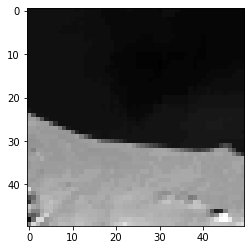

In [6]:
plt.imshow(image_arr[0][3120:3170, 13750:13800], cmap='gray')

In [7]:
hormoz_image = image_arr[0][3120:3170, 13750:13800]

In [8]:
hormoz_image

array([[101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       ...,
       [127, 123, 130, ..., 148, 148, 147],
       [101, 129, 162, ..., 151, 150, 154],
       [135, 162, 152, ..., 154, 160, 163]], dtype=uint8)

In [9]:
np.shape(hormoz_image)

(50, 50)

In [56]:
X = []
for i in range(0, np.shape(hormoz_image)[0]):
    for j in range(0, np.shape(hormoz_image)[1]):
        if i == 0 or j == 0 or i == np.shape(hormoz_image)[0] - 1 or j == np.shape(hormoz_image)[1] -1:
            p = abs(hormoz_image[i][j])
            X.append([
                p, p, p, p, p, p, p, p, p
            ])
        else:
            f1 = abs(hormoz_image[i][j])
            f2 = abs(hormoz_image[i][j + 1])
            f3 = abs(hormoz_image[i][j - 1])
            f4 = abs(hormoz_image[i + 1][j])
            f5 = abs(hormoz_image[i - 1][j])
            f6 = abs(hormoz_image[i + 1][j + 1])
            f7 = abs(hormoz_image[i - 1][j - 1])
            f8 = abs(hormoz_image[i + 1][j - 1])
            f9 = abs(hormoz_image[i - 1][j + 1])
            X.append([
                f1, f2, f3, f4, f5, f6, f7, f8, f9
            ])

In [55]:
np.shape(X)

(2500, 9)

In [57]:
np.asmatrix(X)

matrix([[101, 101, 101, ..., 101, 101, 101],
        [101, 101, 101, ..., 101, 101, 101],
        [101, 101, 101, ..., 101, 101, 101],
        ...,
        [154, 154, 154, ..., 154, 154, 154],
        [160, 160, 160, ..., 160, 160, 160],
        [163, 163, 163, ..., 163, 163, 163]], dtype=uint8)

In [58]:
msh = MeanShift(n_jobs=-1)
msh.fit(X)

MeanShift(n_jobs=-1)

In [59]:
labels = msh.labels_

In [60]:
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67],
       dtype=int64),
 array([1447,  831,   21,   19,   13,   11,   10,   11,    9,    5,    7,
          25,    5,    6,    2,    2,    1,    1,    1,    1,    1,    1,
           1,    1,    5,    1,    1,    3,    1,    1,    4,    1,    2,
           1,    1,    2,    1,    1,    3,    2,    1,    4,    1,    1,
           1,    1,    1,    1,    1,    5,    1,    2,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           2,    2], dtype=int64))

In [61]:
labels_im = np.full(np.shape(hormoz_image), -1.)

In [62]:
labels_im

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [63]:
hormoz_cls = hormoz_image.astype(bool)
labels_im[hormoz_cls] = labels

In [26]:
hormoz_cls

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [64]:
labels_im

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [56., 57., 52., ..., 27.,  1.,  1.],
       [ 0., 53., 22., ..., 30., 24., 11.],
       [49., 11.,  1., ..., 11., 11., 11.]])

In [65]:
hormoz_image

array([[101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       [101, 101, 101, ...,  98,  98,  98],
       ...,
       [127, 123, 130, ..., 148, 148, 147],
       [101, 129, 162, ..., 151, 150, 154],
       [135, 162, 152, ..., 154, 160, 163]], dtype=uint8)

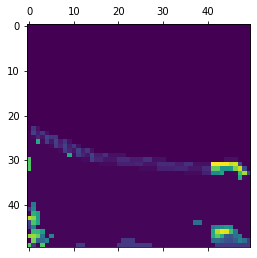

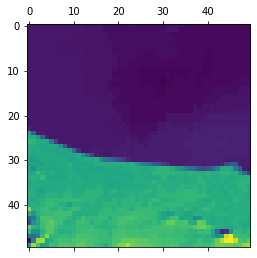

In [66]:
plt.matshow(labels_im)
plt.matshow(hormoz_image)

In [67]:
km = KMeans(n_clusters=2)
km.fit(X)

KMeans(n_clusters=2)

In [68]:
labels = km.labels_

In [69]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([1520,  980], dtype=int64))

In [70]:
labels_im = np.full(np.shape(hormoz_image), -1.)

In [71]:
hormoz_cls = hormoz_image.astype(bool)
labels_im[hormoz_cls] = labels

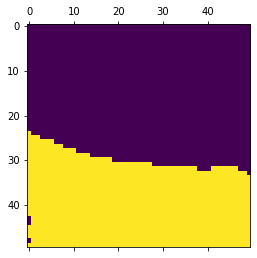

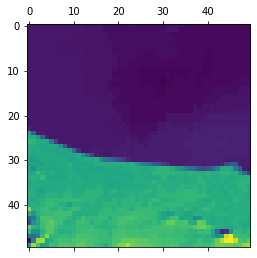

In [72]:
plt.matshow(labels_im)
plt.matshow(hormoz_image)